In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the Iris dataset
df = pd.read_csv(r"C:\Users\ayush\Microsoft\Downloads\iris (1).csv")

In [3]:
# Select features (attributes) for clustering (e.g., sepal_length, sepal_width, petal_length, petal_width)
X = df.iloc[:, 1:-1]  # Exclude the first column (id) and the last column (species)

In [4]:
# Standardize the feature matrix (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [6]:
print(inertia)

[600.0, 223.73200573676348, 140.96581663074699, 114.61788585776677, 91.29544474066981, 81.75658187204954, 71.31982095188795, 62.651767150319046, 55.261841196034645, 50.62316902954044]


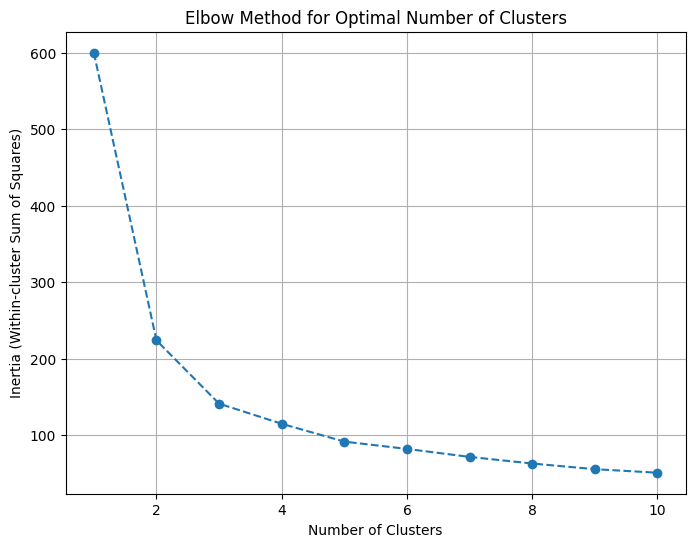

In [7]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

# Practical 4 B)
K-Mediod Algorithm on a credit card dataset

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

# Load the dataset
cc_data = pd.read_csv(r"C:\Users\ayush\Microsoft\Downloads\CC GENERAL.csv")

In [28]:
# Check if 'CUST_ID' column exists
if 'CUST_ID' in cc_data.columns:
    # Drop the 'CUST_ID' column
    cc_data = cc_data.drop('CUST_ID', axis=1)

# Replace NaN values with the mean of each column
cc_data = cc_data.fillna(cc_data.mean())

# Scale the data
scaler = StandardScaler()
cc_data_scaled = scaler.fit_transform(cc_data)

In [29]:
# Determine the number of clusters using the Silhouette Method
silhouette_scores = []
for k in range(2, 11):
    # Initialize centroids randomly
    centroids = cc_data_scaled[np.random.choice(cc_data_scaled.shape[0], k, replace=False)]
    
    # Assign each data point to the closest centroid
    labels = np.argmin(distance.cdist(cc_data_scaled, centroids), axis=1)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(cc_data_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print("For k =", k, "The average silhouette score is :", silhouette_avg)

For k = 2 The average silhouette score is : 0.19263114913342227
For k = 3 The average silhouette score is : 0.22192222086803903
For k = 4 The average silhouette score is : 0.07828393077792777
For k = 5 The average silhouette score is : 0.17166943494662035
For k = 6 The average silhouette score is : 0.09614522087784634
For k = 7 The average silhouette score is : 0.07234778106090448
For k = 8 The average silhouette score is : 0.005378631824878312
For k = 9 The average silhouette score is : 0.04722380909926471
For k = 10 The average silhouette score is : 0.07498597659899524


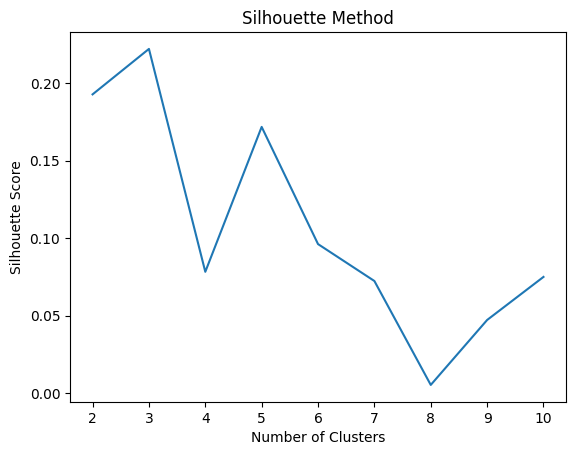

In [30]:
# Plot the silhouette scores
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [31]:
# Choose the number of clusters with the highest silhouette score
k = np.argmax(silhouette_scores) + 2
print("The optimal number of clusters is:", k)

The optimal number of clusters is: 3


In [32]:
# Apply K-Medoids algorithm with the chosen number of clusters
centroids = cc_data_scaled[np.random.choice(cc_data_scaled.shape[0], k, replace=False)]
labels = np.argmin(distance.cdist(cc_data_scaled, centroids), axis=1)

In [33]:
# Print the clusters
for i in range(k):
    cluster_points = cc_data_scaled[labels == i]
    print("Cluster", i+1, "has", len(cluster_points), "data points")

Cluster 1 has 3557 data points
Cluster 2 has 5176 data points
Cluster 3 has 217 data points
